In [72]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# Load the Iris dataset into DataFrame
df = sns.load_dataset('mpg')

## Splitting Name Column to create Make Column

In [74]:
df['Make'] = df['name'].str.split(' ').str[0]

In [75]:
# Renaming a column
df.rename(columns={'mpg': 'MPG'}, inplace=True)
df.rename(columns={'cylinders': 'Engine Cylinders'}, inplace=True)
df.rename(columns={'displacement': 'Displacement (Cubic Inch)'}, inplace=True)
df.rename(columns={'horsepower': 'HP'}, inplace=True)
df.rename(columns={'weight': 'Weight (lbs)'}, inplace=True)
df.rename(columns={'acceleration': 'Acceleration'}, inplace=True)
df.rename(columns={'model_year': 'Year'}, inplace=True)
df.rename(columns={'origin': 'Country of Origin'}, inplace=True)

## Initial view of the Data in the Data Frame

In [76]:
print(df.head())

    MPG  Engine Cylinders  Displacement (Cubic Inch)     HP  Weight (lbs)  \
0  18.0                 8                      307.0  130.0          3504   
1  15.0                 8                      350.0  165.0          3693   
2  18.0                 8                      318.0  150.0          3436   
3  16.0                 8                      304.0  150.0          3433   
4  17.0                 8                      302.0  140.0          3449   

   Acceleration  Year Country of Origin                       name       Make  
0          12.0    70               usa  chevrolet chevelle malibu  chevrolet  
1          11.5    70               usa          buick skylark 320      buick  
2          11.0    70               usa         plymouth satellite   plymouth  
3          12.0    70               usa              amc rebel sst        amc  
4          10.5    70               usa                ford torino       ford  


In [77]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

    MPG  Engine Cylinders  Displacement (Cubic Inch)     HP  Weight (lbs)  \
0  18.0                 8                      307.0  130.0          3504   
1  15.0                 8                      350.0  165.0          3693   
2  18.0                 8                      318.0  150.0          3436   
3  16.0                 8                      304.0  150.0          3433   
4  17.0                 8                      302.0  140.0          3449   
5  15.0                 8                      429.0  198.0          4341   
6  14.0                 8                      454.0  220.0          4354   
7  14.0                 8                      440.0  215.0          4312   
8  14.0                 8                      455.0  225.0          4425   
9  15.0                 8                      390.0  190.0          3850   

   Acceleration  Year Country of Origin                       name       Make  
0          12.0    70               usa  chevrolet chevelle malibu  chev

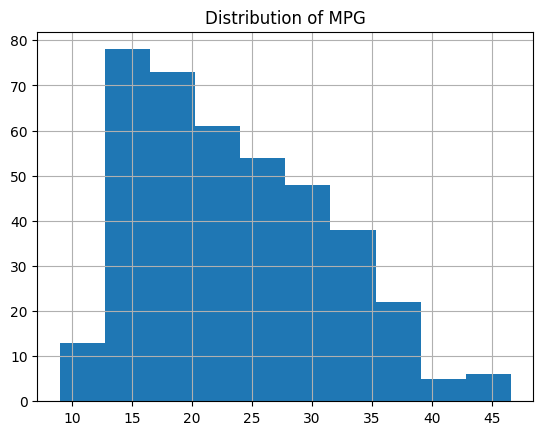

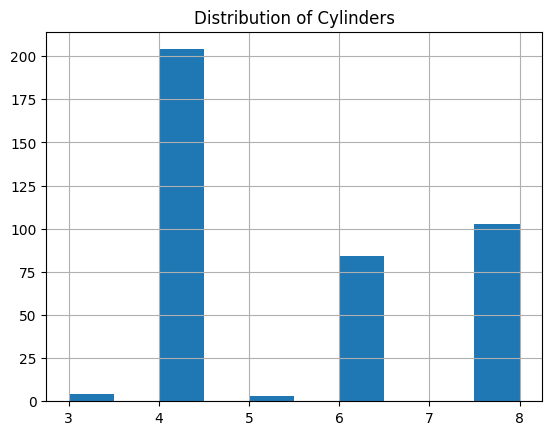

In [79]:
# Inspect histogram by numerical column
df['MPG'].hist()
plt.title(f'Distribution of MPG')
plt.show()


df['Engine Cylinders'].hist()
plt.title(f'Distribution of Cylinders')
plt.show()


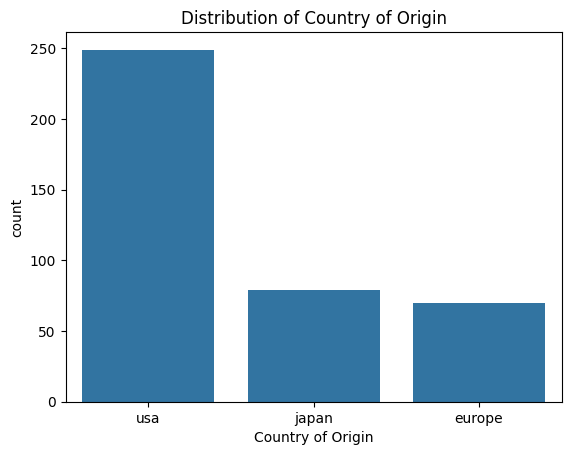

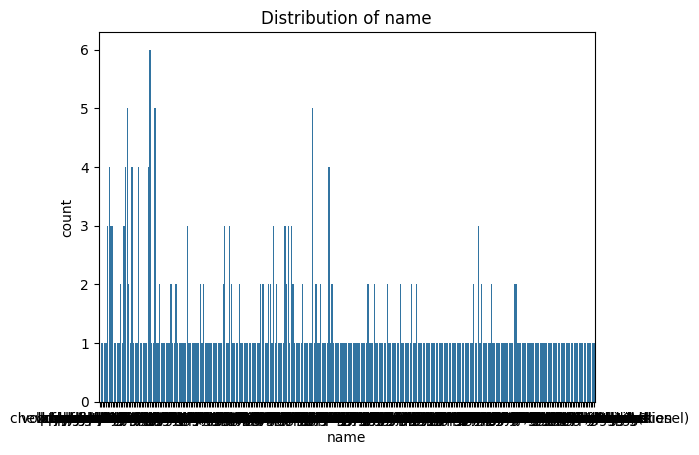

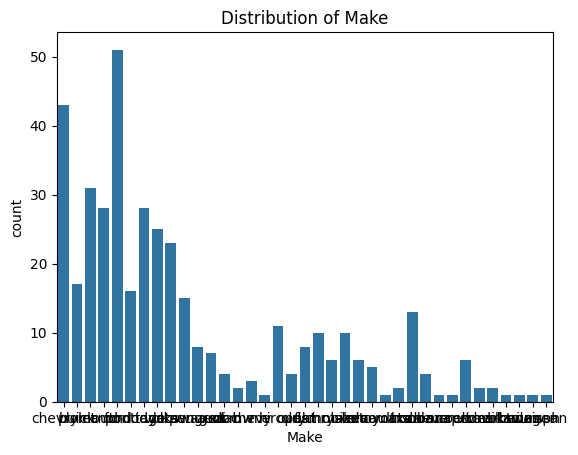

In [81]:
# Inspect value counts by categorical column
df['Country of Origin'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


plt.show()